In [18]:
import os
import time

import torch
import nibabel as nib
from torchsummary import summary
import numpy as np
from matplotlib import pyplot as plt

In [19]:
from unet_3d_pt import Network, PTDataset
# from . import Network

In [20]:
folderpath_dataset = "/data/cmokashi/msd/brain_tumor/"
subfolder_sample = "imagesTr"
filename_sample = "BRATS_271.nii.gz"
filepath_sample = os.path.join(folderpath_dataset, subfolder_sample,filename_sample)

In [21]:
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
device = torch.device("cpu")

In [22]:
img = nib.load(filepath_sample)
data = img.get_fdata()
data.shape, type(data)

((240, 240, 155, 4), numpy.ndarray)

In [23]:
# x = torch.from_numpy(data)
x = torch.tensor(data, dtype=torch.float32)
x = torch.unsqueeze(x, 0)
x = x.permute(0, 4, 1, 2, 3)
x = x.to(device)
x.shape, x.dtype

(torch.Size([1, 4, 240, 240, 155]), torch.float32)

In [24]:
model = Network(in_channels=4, num_classes=2)
model.to(device)
start_time = time.time()
y = model(x)
print(f"---- {time.time() - start_time} seconds----")
print(y.size())

---- 37.35367727279663 seconds----
torch.Size([1, 2, 240, 240, 155])


In [25]:
summary(model, input_size=(4, 240, 240, 155))

Layer (type:depth-idx)                   Param #
├─Conv3DBlock: 1-1                       --
|    └─Conv3d: 2-1                       3,488
|    └─BatchNorm3d: 2-2                  64
|    └─Conv3d: 2-3                       55,360
|    └─BatchNorm3d: 2-4                  128
|    └─ReLU: 2-5                         --
|    └─MaxPool3d: 2-6                    --
├─Conv3DBlock: 1-2                       --
|    └─Conv3d: 2-7                       110,656
|    └─BatchNorm3d: 2-8                  128
|    └─Conv3d: 2-9                       221,312
|    └─BatchNorm3d: 2-10                 256
|    └─ReLU: 2-11                        --
|    └─MaxPool3d: 2-12                   --
├─Conv3DBlock: 1-3                       --
|    └─Conv3d: 2-13                      442,496
|    └─BatchNorm3d: 2-14                 256
|    └─Conv3d: 2-15                      884,992
|    └─BatchNorm3d: 2-16                 512
|    └─ReLU: 2-17                        --
|    └─MaxPool3d: 2-18                 

Layer (type:depth-idx)                   Param #
├─Conv3DBlock: 1-1                       --
|    └─Conv3d: 2-1                       3,488
|    └─BatchNorm3d: 2-2                  64
|    └─Conv3d: 2-3                       55,360
|    └─BatchNorm3d: 2-4                  128
|    └─ReLU: 2-5                         --
|    └─MaxPool3d: 2-6                    --
├─Conv3DBlock: 1-2                       --
|    └─Conv3d: 2-7                       110,656
|    └─BatchNorm3d: 2-8                  128
|    └─Conv3d: 2-9                       221,312
|    └─BatchNorm3d: 2-10                 256
|    └─ReLU: 2-11                        --
|    └─MaxPool3d: 2-12                   --
├─Conv3DBlock: 1-3                       --
|    └─Conv3d: 2-13                      442,496
|    └─BatchNorm3d: 2-14                 256
|    └─Conv3d: 2-15                      884,992
|    └─BatchNorm3d: 2-16                 512
|    └─ReLU: 2-17                        --
|    └─MaxPool3d: 2-18                 

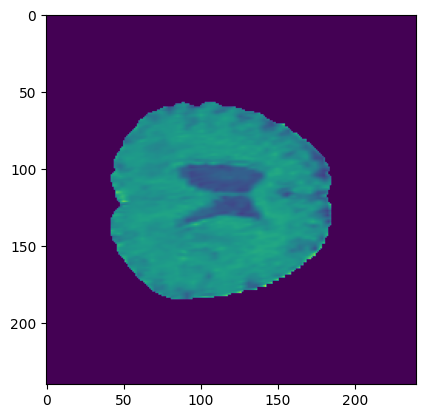

In [26]:
# plt.imshow(data[:, :, 21, 2], cmap="gray")
plt.imshow(data[:, :, 100, 2])
plt.show()

In [27]:
train = PTDataset(data_dir="unet_3d_pt/dataset")
test = PTDataset(data_dir="unet_3d_pt/dataset", is_train=False)

In [28]:
len(train), len(test)

(387, 97)